In [1]:
import numpy as numpy
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data_dir = "data/"

train = pd.read_csv(data_dir + "train.csv")

train.head()

,row_id,QuestionId,QuestionText,MC_Answer,StudentExplanation,Category,Misconception
0,0,31772,What fraction of the shape is not shaded? Give...,\( \frac{1}{3} \),0ne third is equal to tree nineth,True_Correct,NaN
1,1,31772,What fraction of the shape is not shaded? Give...,\( \frac{1}{3} \),1 / 3 because 6 over 9 is 2 thirds and 1 third...,True_Correct,NaN
2,2,31772,What fraction of the shape is not shaded? Give...,\( \frac{1}{3} \),"1 3rd is half of 3 6th, so it is simplee to un...",True_Neither,NaN
3,3,31772,What fraction of the shape is not shaded? Give...,\( \frac{1}{3} \),1 goes into everything and 3 goes into nine,True_Neither,NaN
4,4,31772,What fraction of the shape is not shaded? Give...,\( \frac{1}{3} \),1 out of every 3 isn't coloured,True_Correct,NaN


In [3]:
train.describe()

,row_id,QuestionId
count,36696.000000,36696.000000
mean,18347.500000,46356.825104
std,10593.367076,25617.723392
min,0.000000,31772.000000
25%,9173.750000,31777.000000
50%,18347.500000,32833.000000
75%,27521.250000,33474.000000
max,36695.000000,109465.000000


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36696 entries, 0 to 36695
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   row_id              36696 non-null  int64 
 1   QuestionId          36696 non-null  int64 
 2   QuestionText        36696 non-null  object
 3   MC_Answer           36696 non-null  object
 4   StudentExplanation  36696 non-null  object
 5   Category            36696 non-null  object
 6   Misconception       9860 non-null   object
dtypes: int64(2), object(5)
memory usage: 2.0+ MB


In [5]:
train.isna().sum()

row_id                    0
QuestionId                0
QuestionText              0
MC_Answer                 0
StudentExplanation        0
Category                  0
Misconception         26836
dtype: int64

<Axes: xlabel='Category'>

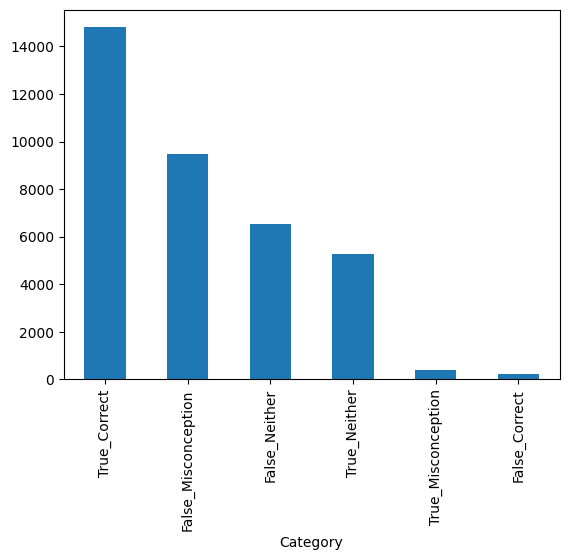

In [6]:
train.Category.value_counts().plot(kind='bar')

<Axes: xlabel='Misconception'>

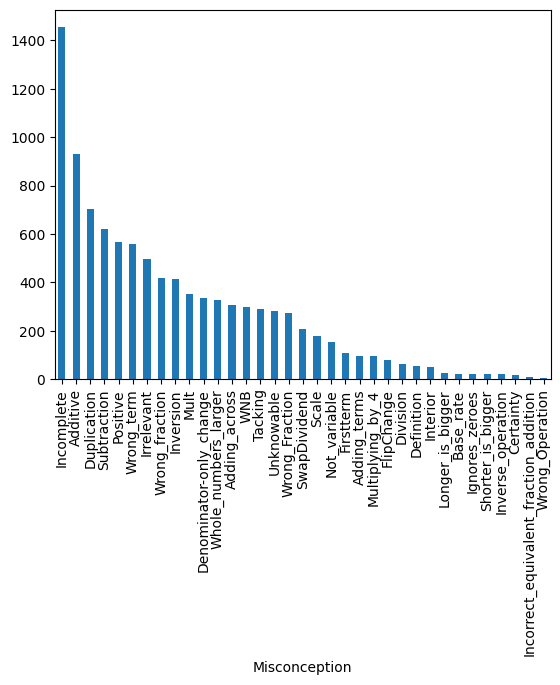

In [7]:
train.Misconception.value_counts().plot(kind='bar')

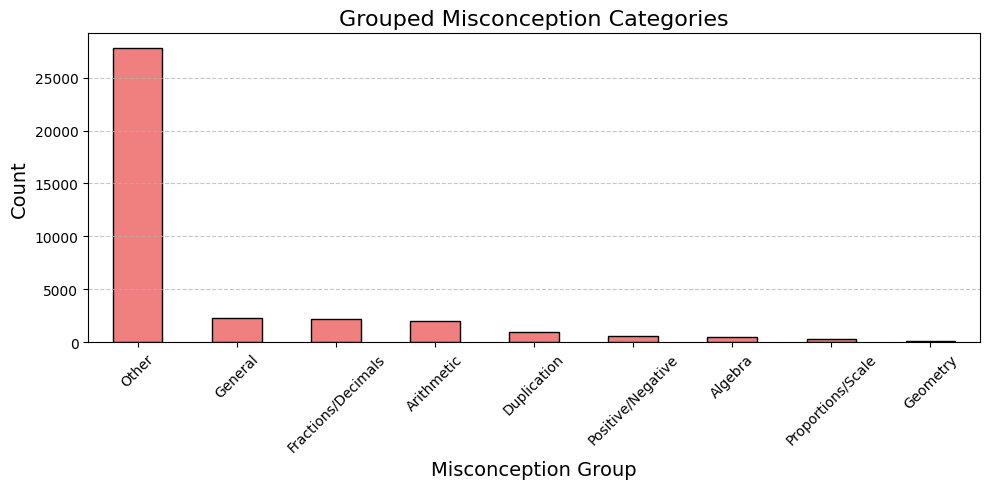

In [8]:

# Define grouping map
misconception_general = {
    "General": ["Incomplete", "Irrelevant", "Unknowable", "Certainty"],
    "Arithmetic": ["Additive", "Subtraction", "Mult", "Division", "Inverse_operation", "Wrong_Operation"],
    "Fractions/Decimals": [
        "Wrong_fraction", "Wrong_Fraction", "Adding_across", "Denominator-only_change", 
        "Whole_numbers_larger", "WNB", "Ignores_zeroes", "SwapDividend", 
        "Incorrect_equivalent_fraction_addition"
    ],
    "Algebra": ["Not_variable", "Firstterm", "Adding_terms", "Multiplying_by_4", "Definition"],
    "Proportions/Scale": ["Scale", "FlipChange", "Base_rate"],
    "Geometry": ["Interior", "Longer_is_bigger", "Shorter_is_bigger"],
    "Positive/Negative": ["Positive"],
    "Duplication": ["Duplication", "Tacking"]
}

# Create reverse map for fast lookup
reverse_map = {}
for group, misconceptions in misconception_general.items():
    for m in misconceptions:
        reverse_map[m] = group

# Assign group to each row in train
train['Misconception_Group'] = train['Misconception'].map(reverse_map).fillna('Other')

# Count by group
group_counts = train['Misconception_Group'].value_counts()

# Plot grouped bar chart
plt.figure(figsize=(10,5))
group_counts.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Grouped Misconception Categories', fontsize=16)
plt.xlabel('Misconception Group', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [9]:
from preprocess import preprocess_data


X,Y= preprocess_data(train)


/home/saed/Desktop/kaggle/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
import torch
torch.tensor(X.input_ids[0])

tensor([  101,  3160,  1024,  2054, 12884,  1997,  1996,  4338,  2003,  2025,
        25273,  1029,  2507,  2115,  3437,  1999,  2049, 21304,  2433,  1012,
         1031,  3746,  1024,  1037,  9546,  3975,  2046,  1023,  5020,  3760,
        27189,  1012,  1020,  1997,  2068,  2024, 25273,  1012,  1033,  3437,
         1024,  1032,  1006,  1032, 25312,  2278,  1063,  1015,  1065,  1063,
         1017,  1065,  1032,  1007,  7526,  1024,  1014,  2638,  2353,  2003,
         5020,  2000,  3392,  3157,  2705,   102,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0, 

In [11]:
from Model import CategoryModel

model=CategoryModel()

input_ids = torch.tensor(X['input_ids'][0]).unsqueeze(0)
attention_mask = torch.tensor(X['attention_mask'][0]).unsqueeze(0)

logits = model(input_ids, attention_mask)
logits-torch.tensor(Y[0]).unsqueeze(0)


/home/saed/Desktop/kaggle/.venv/lib/python3.11/site-packages/torch/nn/modules/module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


tensor([[-0.9841,  0.1574, -0.1858, -0.0610,  0.0848, -0.0282]],
       dtype=torch.float64, grad_fn=<SubBackward0>)

In [12]:
logits

tensor([[ 0.0159,  0.1574, -0.1858, -0.0610,  0.0848, -0.0282]],
       grad_fn=<AddmmBackward0>)

In [13]:
torch.tensor(Y[0])

tensor([1., 0., 0., 0., 0., 0.], dtype=torch.float64)

In [14]:
from torch import nn

lss_fn=nn.CrossEntropyLoss()

lss_fn(logits,torch.tensor(Y[0]).unsqueeze(0))

tensor(1.7789, dtype=torch.float64, grad_fn=<DivBackward1>)

In [15]:
from DataLoader import QAEDataset
from torch.utils.data import DataLoader

dataset=QAEDataset(X,Y)
datasettt=DataLoader(dataset,2)

In [16]:
data=next(iter(datasettt))
model(data['input'],data['attn'])

tensor([[ 0.1496, -0.0473, -0.0204, -0.1641,  0.2013, -0.1407],
        [ 0.1756, -0.0927, -0.0415, -0.0327,  0.2981,  0.0008]],
       grad_fn=<AddmmBackward0>)

In [ ]:
import torch
from torch.utils.data import DataLoader, random_split
from torch import nn, optim
from tqdm import tqdm
import numpy as np

from preprocess import preprocess_data
from DataLoader import QAEDataset
from Model import CategoryModel  # your model class

# ✅ Preprocess data
X, y = preprocess_data(train)

# Convert y to integer labels for CrossEntropy
y_int = np.argmax(y, axis=1)

# ✅ Dataset & Split
dataset = QAEDataset(X, y_int)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size

train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False)

# ✅ Model, Loss, Optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CategoryModel().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=2e-5)

# ✅ Training Loop
EPOCHS = 3

for epoch in range(EPOCHS):
    model.train()
    train_loss = 0.0

    pbar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{EPOCHS} [Train]")
    for batch in pbar:
        input_ids = batch['input'].to(device)
        attention_mask = batch['attn'].to(device)
        labels = batch['label'].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        pbar.set_postfix({"Loss": loss.item()})

    avg_train_loss = train_loss / len(train_loader)

    # ✅ Validation Loop
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        pbar_val = tqdm(val_loader, desc=f"Epoch {epoch+1}/{EPOCHS} [Val]")
        for batch in pbar_val:
            input_ids = batch['input'].to(device)
            attention_mask = batch['attn'].to(device)
            labels = batch['label'].to(device)

            outputs = model(input_ids, attention_mask)
            loss = criterion(outputs, labels)

            val_loss += loss.item()

            preds = torch.argmax(outputs, dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

            pbar_val.set_postfix({"Val Loss": loss.item()})

    avg_val_loss = val_loss / len(val_loader)
    accuracy = correct / total

    print(f"Epoch {epoch+1}: Train Loss={avg_train_loss:.4f}, Val Loss={avg_val_loss:.4f}, Val Acc={accuracy:.4f}")
